In [1]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
val_df = pd.read_csv('data/val.csv')
test_df = pd.read_csv('data/test.csv')

In [2]:
df1 = train_df.append(val_df, ignore_index=True).append(test_df, ignore_index=True)

len(df1)

14478

In [3]:
df1.rename(columns={'camera': 'source'}, inplace=True)
df1.head()

,image_path,label,subject,source
0,data/Camera 1/train/c0/1000.jpg,0,7,1
1,data/Camera 1/train/c0/1001.jpg,0,7,1
2,data/Camera 1/train/c0/1002.jpg,0,7,1
3,data/Camera 1/train/c0/1003.jpg,0,7,1
4,data/Camera 1/train/c0/1004.jpg,0,7,1


In [4]:
df1['subject'] = df1.subject.astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  14478 non-null  object
 1   label       14478 non-null  int64 
 2   subject     14478 non-null  object
 3   source      14478 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 452.6+ KB


In [5]:
df1.loc[df1.source == 1, 'source'] = 'Camera 1'
df1.loc[df1.source == 2, 'source'] = 'Camera 2'
df1['subject'] = 'p' + df1.subject
df1.head()

,image_path,label,subject,source
0,data/Camera 1/train/c0/1000.jpg,0,p7,Camera 1
1,data/Camera 1/train/c0/1001.jpg,0,p7,Camera 1
2,data/Camera 1/train/c0/1002.jpg,0,p7,Camera 1
3,data/Camera 1/train/c0/1003.jpg,0,p7,Camera 1
4,data/Camera 1/train/c0/1004.jpg,0,p7,Camera 1


In [6]:
import glob

df2 = []
for filepath in glob.glob('data/StateFarm/*/*'):
    classId = filepath.split('/')[-2][1:]
    df2.append({
        'image_path': filepath,
        'label': int(classId)
    })
    
df2 = pd.DataFrame(df2)
df2.head()

,image_path,label
0,data/StateFarm/c0/img_100026.jpg,0
1,data/StateFarm/c0/img_10003.jpg,0
2,data/StateFarm/c0/img_100050.jpg,0
3,data/StateFarm/c0/img_100074.jpg,0
4,data/StateFarm/c0/img_10012.jpg,0


In [7]:
subjects = pd.read_csv('data/driver_imgs_list.csv')

In [8]:
subjects.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [9]:
subjects['img'] = 'data/StateFarm/' + subjects.classname + '/' + subjects.img

subjects.head()

,subject,classname,img
0,p002,c0,data/StateFarm/c0/img_44733.jpg
1,p002,c0,data/StateFarm/c0/img_72999.jpg
2,p002,c0,data/StateFarm/c0/img_25094.jpg
3,p002,c0,data/StateFarm/c0/img_69092.jpg
4,p002,c0,data/StateFarm/c0/img_92629.jpg


In [10]:
df2 = pd.merge(df2, subjects, left_on='image_path', right_on='img', sort=False)

df2.head()

,image_path,label,subject,classname,img
0,data/StateFarm/c0/img_100026.jpg,0,p015,c0,data/StateFarm/c0/img_100026.jpg
1,data/StateFarm/c0/img_10003.jpg,0,p022,c0,data/StateFarm/c0/img_10003.jpg
2,data/StateFarm/c0/img_100050.jpg,0,p022,c0,data/StateFarm/c0/img_100050.jpg
3,data/StateFarm/c0/img_100074.jpg,0,p051,c0,data/StateFarm/c0/img_100074.jpg
4,data/StateFarm/c0/img_10012.jpg,0,p002,c0,data/StateFarm/c0/img_10012.jpg


In [11]:
df2 = df2[['image_path', 'label', 'subject']]
df2['source'] = 'StateFarm'

df2.head()

,image_path,label,subject,source
0,data/StateFarm/c0/img_100026.jpg,0,p015,StateFarm
1,data/StateFarm/c0/img_10003.jpg,0,p022,StateFarm
2,data/StateFarm/c0/img_100050.jpg,0,p022,StateFarm
3,data/StateFarm/c0/img_100074.jpg,0,p051,StateFarm
4,data/StateFarm/c0/img_10012.jpg,0,p002,StateFarm


In [12]:
df = df1.append(df2)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36902 entries, 0 to 22423
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  36902 non-null  object
 1   label       36902 non-null  int64 
 2   subject     36902 non-null  object
 3   source      36902 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [13]:
df.subject.unique()

array(['p7', 'p8', 'p11', 'p12', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19',
       'p20', 'p21', 'p27', 'p23', 'p24', 'p25', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p28', 'p32', 'p42', 'p44', 'p34', 'p35', 'p36', 'p37',
       'p40', 'p9', 'p10', 'p13', 'p22', 'p26', 'p1', 'p43', 'p33', 'p29',
       'p30', 'p31', 'p45', 'p38', 'p39', 'p41', 'p015', 'p022', 'p051',
       'p002', 'p042', 'p050', 'p021', 'p014', 'p026', 'p072', 'p045',
       'p064', 'p075', 'p012', 'p052', 'p047', 'p039', 'p061', 'p035',
       'p041', 'p081', 'p024', 'p049', 'p016', 'p066', 'p056'],
      dtype=object)

In [14]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, train_size=.6, random_state=42)

for train_idx, val_test_idx in gss.split(df, groups=df.subject):
    val_test_df = df.iloc[val_test_idx]
    train_df = df.iloc[train_idx]

In [15]:
gss = GroupShuffleSplit(n_splits=1, train_size=.5, random_state=42)

for val_idx, test_idx in gss.split(val_test_df, groups=val_test_df.subject):
    test_df = df.iloc[test_idx]
    val_df = df.iloc[val_idx]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


def explore(df):
    plt.figure(figsize=(15, 10))
    # class distribution
    sns.countplot(x='label', data=df)
    plt.title(f'Class Distribution')
    plt.show()

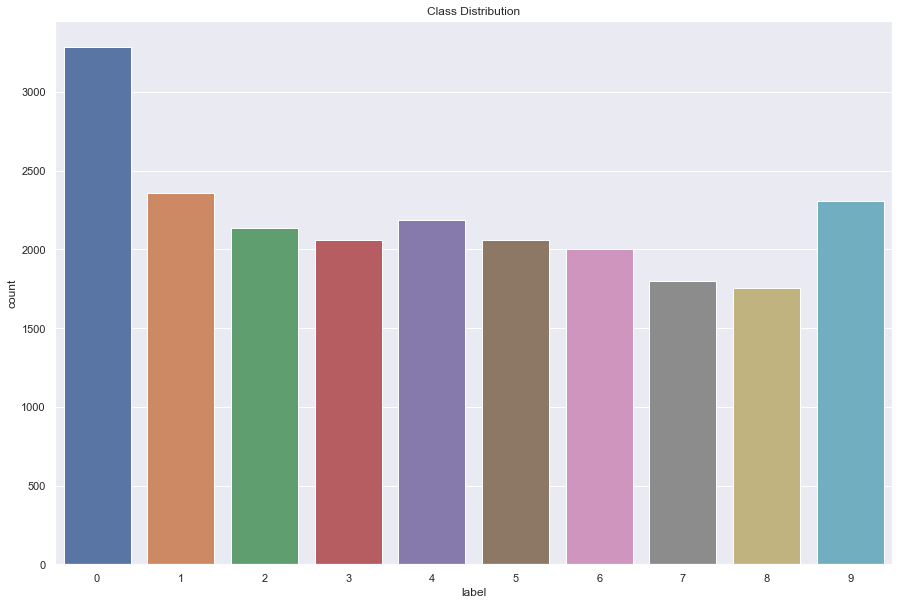

In [17]:
explore(train_df)

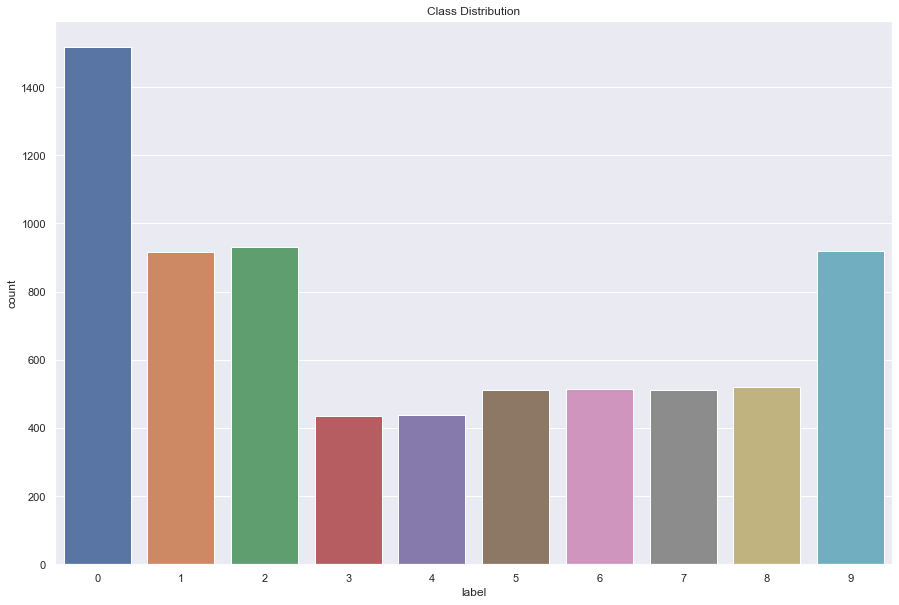

In [18]:
explore(val_df)

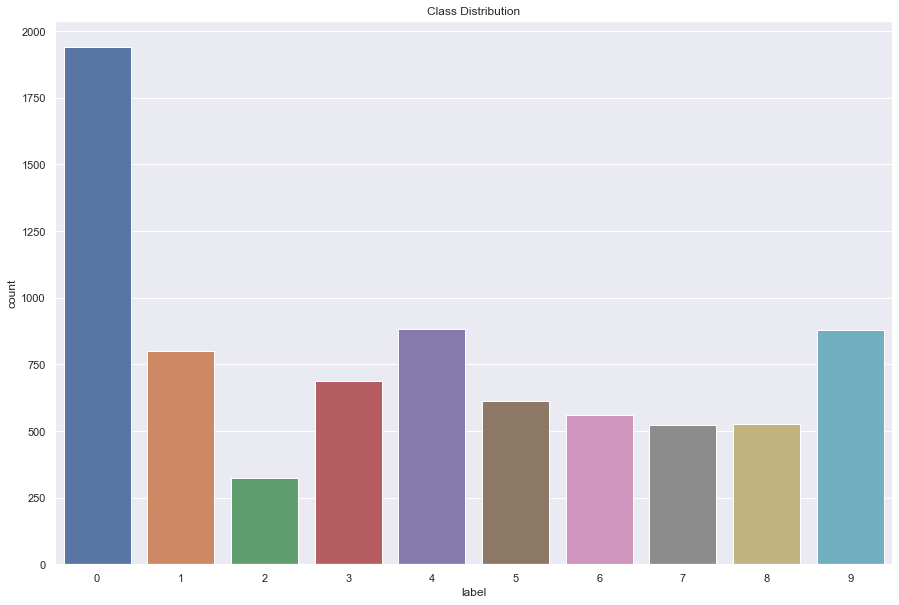

In [19]:
explore(test_df)

In [20]:
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)